<a href="https://colab.research.google.com/github/wei1347/Coursera_Capstone/blob/main/Segmenting_and_Clustering_Neighborhoods_in_Toronto_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.**Description of Assignment**

In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto based on the postalcode and borough information.. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas  dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

Your submission will be a link to your Jupyter Notebook on your Github repository.

# 2.Scraping the content from Wikipedia page.
For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

Start by creating a new Notebook for this 

*   Start by creating a new Notebook for this assignment.
*   [Hints for scraping Notebook](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/NewLinkWebscrapingHints.md)

*   List item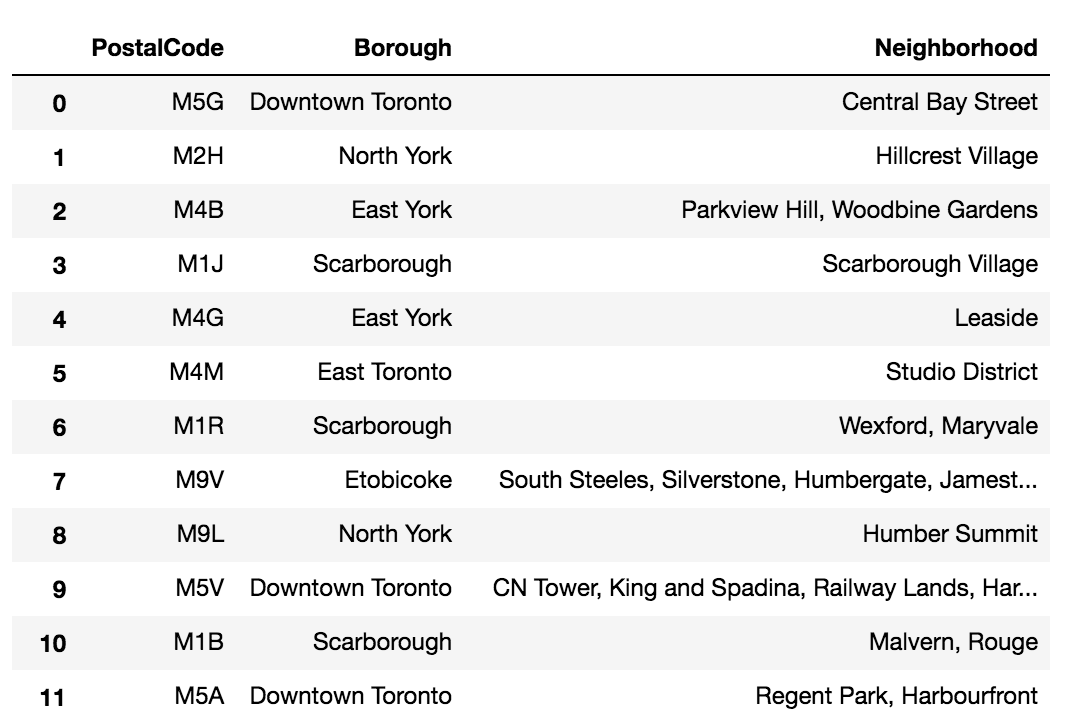
*    To create the above dataframe:




* The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
* Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
* More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
* If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
* Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
* In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.



In [25]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import folium
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim

In [26]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

In [27]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [28]:
print(f"There are {df.loc[df['Borough'] == 'Not assigned'].shape[0]} Not assigned Boroughs")
print(f"There are {df.loc[df['Neighborhood'] == 'Not assigned'].shape[0]} Not assigned Neighborhoods")

There are 0 Not assigned Boroughs


In [34]:
df.head(10)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [33]:
print(df.shape)

(103, 3)


# 3.Use the Geocoder package or the csv file to create the following dataframe:

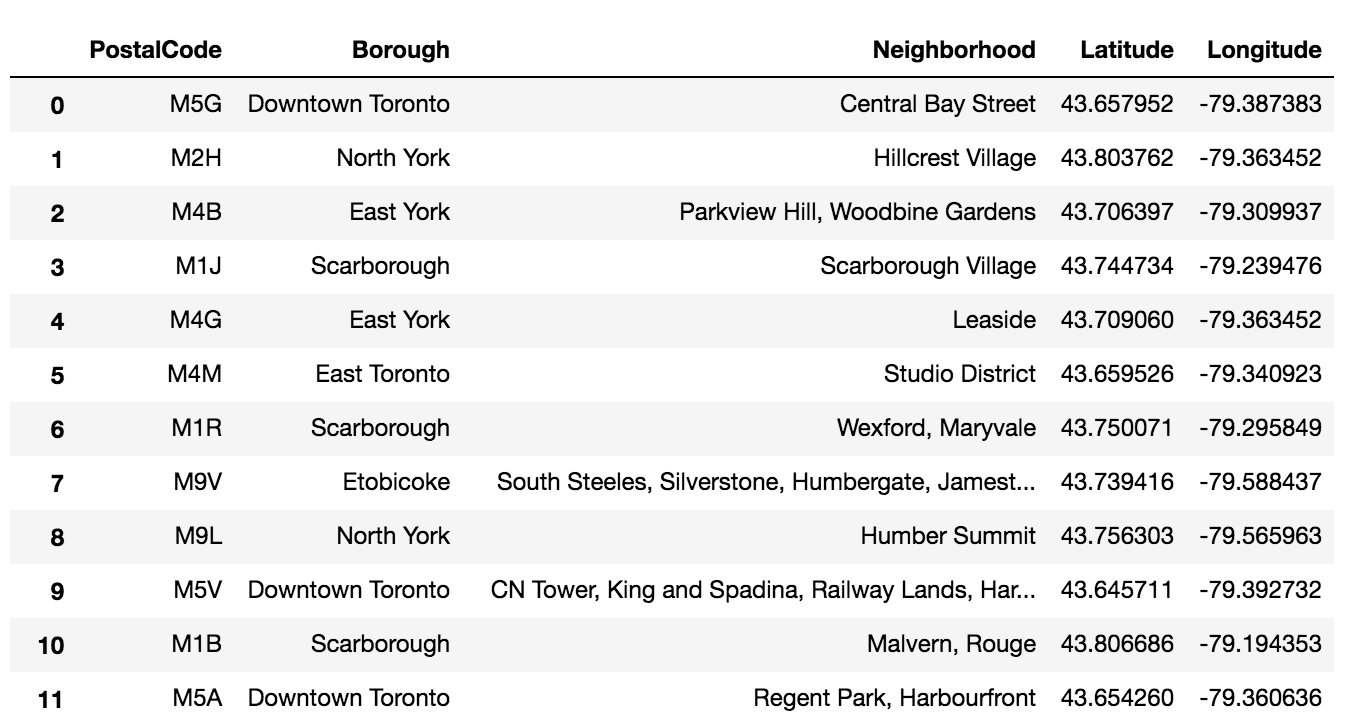

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

Note: While including the link do not copy paste the URL. Use the embedded link option in the formatting  tools of the Response field to include the link. Check the  displayed in image below



In [35]:
coordinates = pd.read_csv("Geospatial_Coordinates.csv")
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [36]:
coordinates.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
df = df.join(coordinates.set_index('PostalCode'), on='PostalCode')

In [38]:
df.head(11)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


# 4.Explore and cluster the neighborhoods in Toronto.

## 4.1 - Creating map of all the city with neighborhoods superimposed.

In [39]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto-explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [40]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## 4.2 - Selecting only the boroughs that contain the word Toronto

In [41]:
df_toronto_borough = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)
df_toronto_borough.shape

(39, 5)

In [43]:
CLIENT_ID = 'OBDWYHZQJBTMXPX03BR4G34ICSNWSSI2DMVBH4MNNP4OOV1R' # your Foursquare ID
CLIENT_SECRET = 'MC2OA5IPUBVKSMM0H3XATYJNZNFGRULEBCKAQIS52RCATMOQ' # your Foursquare Secret
VERSION = '20210719' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OBDWYHZQJBTMXPX03BR4G34ICSNWSSI2DMVBH4MNNP4OOV1R
CLIENT_SECRET:MC2OA5IPUBVKSMM0H3XATYJNZNFGRULEBCKAQIS52RCATMOQ


In [44]:
def getNearbyVenues(boroughs, neighborhoods, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for borough, neighborhood, lat, lng in zip(boroughs, neighborhoods, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            neighborhood, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
borough_neighborhood_venues = getNearbyVenues(boroughs=df_toronto_borough['Borough'],
                                             neighborhoods=df_toronto_borough['Neighborhood'],
                                             latitudes=df_toronto_borough['Latitude'],
                                             longitudes=df_toronto_borough['Longitude'])

In [46]:
borough_neighborhood_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
